<a href="https://colab.research.google.com/github/preethi63790/TASK-7/blob/main/TASK%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

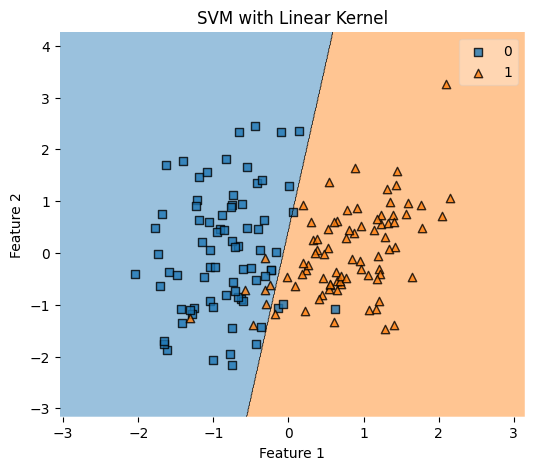

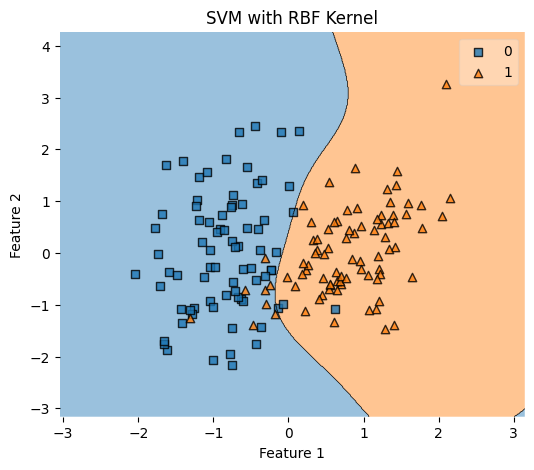

Best parameters from GridSearchCV:
{'C': 1, 'gamma': 0.01}
Cross-validation Accuracy: 0.94 (+/- 0.04)


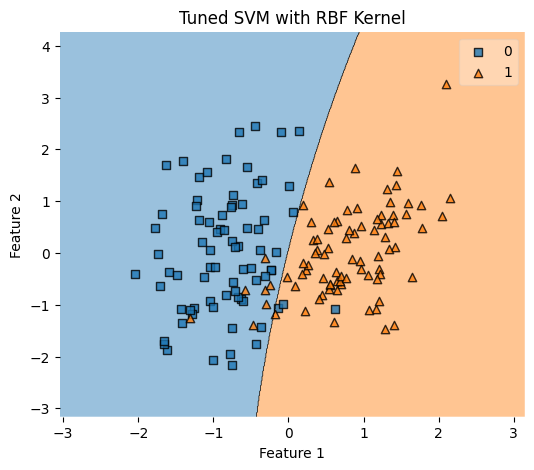

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data[:, :2], data.target
X, y = make_classification(n_samples=200, n_features=2,
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep=1.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train, y_train)
plt.figure(figsize=(6, 5))
plot_decision_regions(X_train, y_train, clf=linear_svm)
plt.title("SVM with Linear Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_svm.fit(X_train, y_train)
plt.figure(figsize=(6, 5))
plot_decision_regions(X_train, y_train, clf=rbf_svm)
plt.title("SVM with RBF Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters from GridSearchCV:")
print(grid.best_params_)
best_model = grid.best_estimator_
scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"Cross-validation Accuracy: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})")
plt.figure(figsize=(6, 5))
plot_decision_regions(X_train, y_train, clf=best_model)
plt.title("Tuned SVM with RBF Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
